In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.normalizar import normalizar_0_1, normalizar_neg1_1
from utils.diferenciaciones import diferenciar
from utils.estandarizacion import estandarizar
from utils.escalas import logaritmica, cuadrada
from utils.descomp_cuantitativa import tendencia, estacionalidad
from utils.fourier import dom_freq
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
pd.set_option("display.max_columns", None)

ruta_dataset = 'data/train_FD001.txt'

headers = [
    "unit_number",
    "time_cycles",
    "operational_setting_1",
    "operational_setting_2",
    "operational_setting_3"]

headers += [f"sensor_{i}" for i in range(1, 22)]

In [3]:
df_FD001 = pd.read_csv(ruta_dataset, delim_whitespace=True, header=None, names=headers)
df_FD001.head()

/tmp/ipykernel_8859/1599241784.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_FD001 = pd.read_csv(ruta_dataset, delim_whitespace=True, header=None, names=headers)


,unit_number,time_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Hay que trabajar con los primeros 5 sensores nada más
- Se encuentran valores en los sensores:
    - 2, 3, 4, 7, 

In [4]:
df = df_FD001.copy()
sensores = [f'sensor_{i}' for i in range(1,9)]
df = df[sensores]
df['conteo'] = range(1, len(df) + 1)
df = df[['conteo'] + sensores]

# Eliminar las columnas con valores constantes en sensores
constantes = ['sensor_1', 'sensor_5', 'sensor_7']
df = df.drop(columns=constantes)

df.head()

,conteo,sensor_2,sensor_3,sensor_4,sensor_6,sensor_8
0,1,641.82,1589.70,1400.60,21.61,2388.06
1,2,642.15,1591.82,1403.14,21.61,2388.04
2,3,642.35,1587.99,1404.20,21.61,2388.08
3,4,642.35,1582.79,1401.87,21.61,2388.11
4,5,642.37,1582.85,1406.22,21.61,2388.06


In [5]:
df.shape

(20631, 6)

<Axes: xlabel='conteo'>

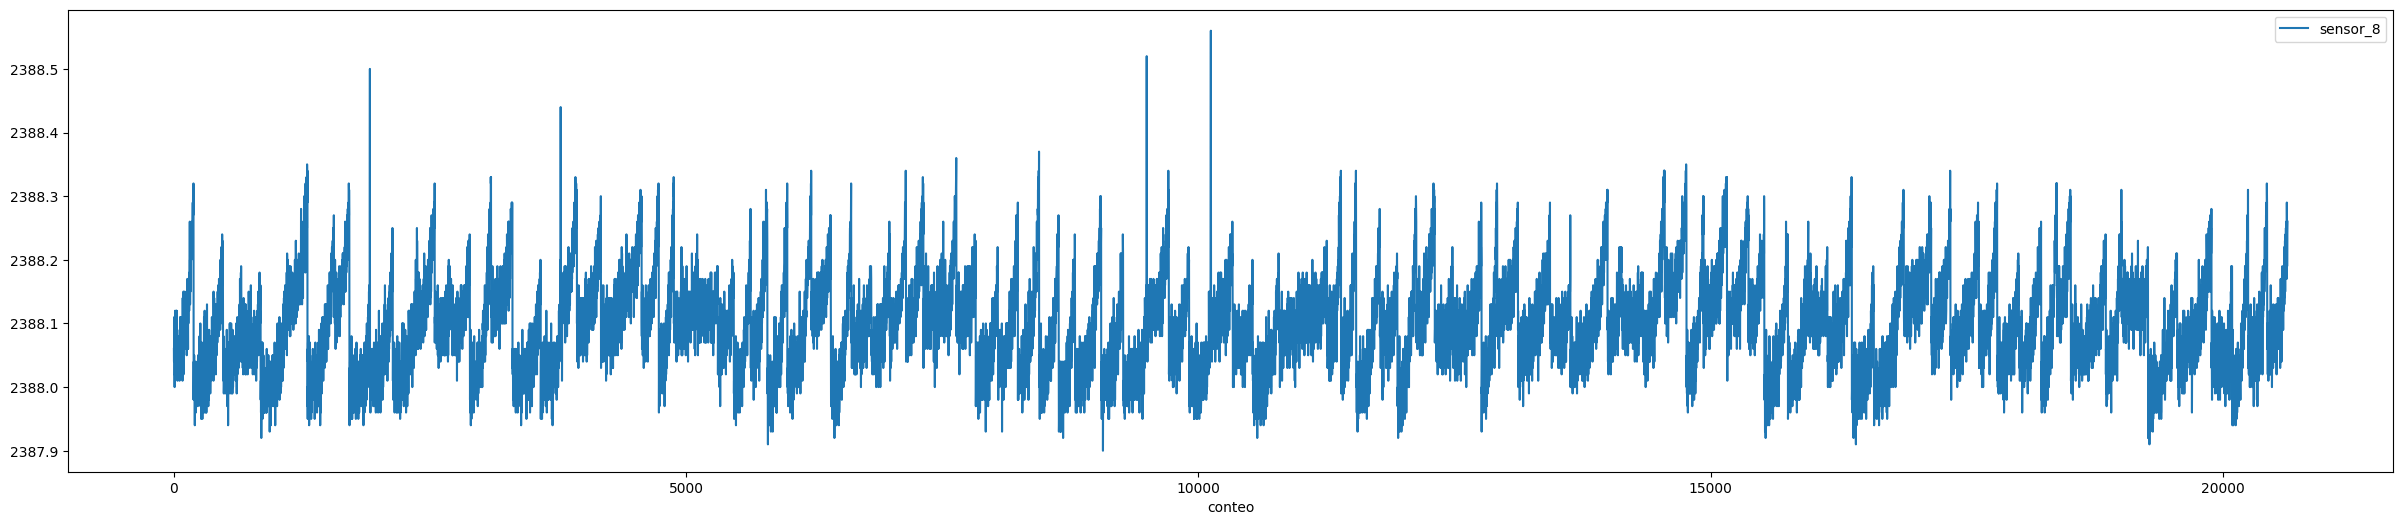

In [6]:
df.plot(
    x = 'conteo',
    y = 'sensor_8',
    figsize=(30,6))

<Axes: xlabel='conteo'>

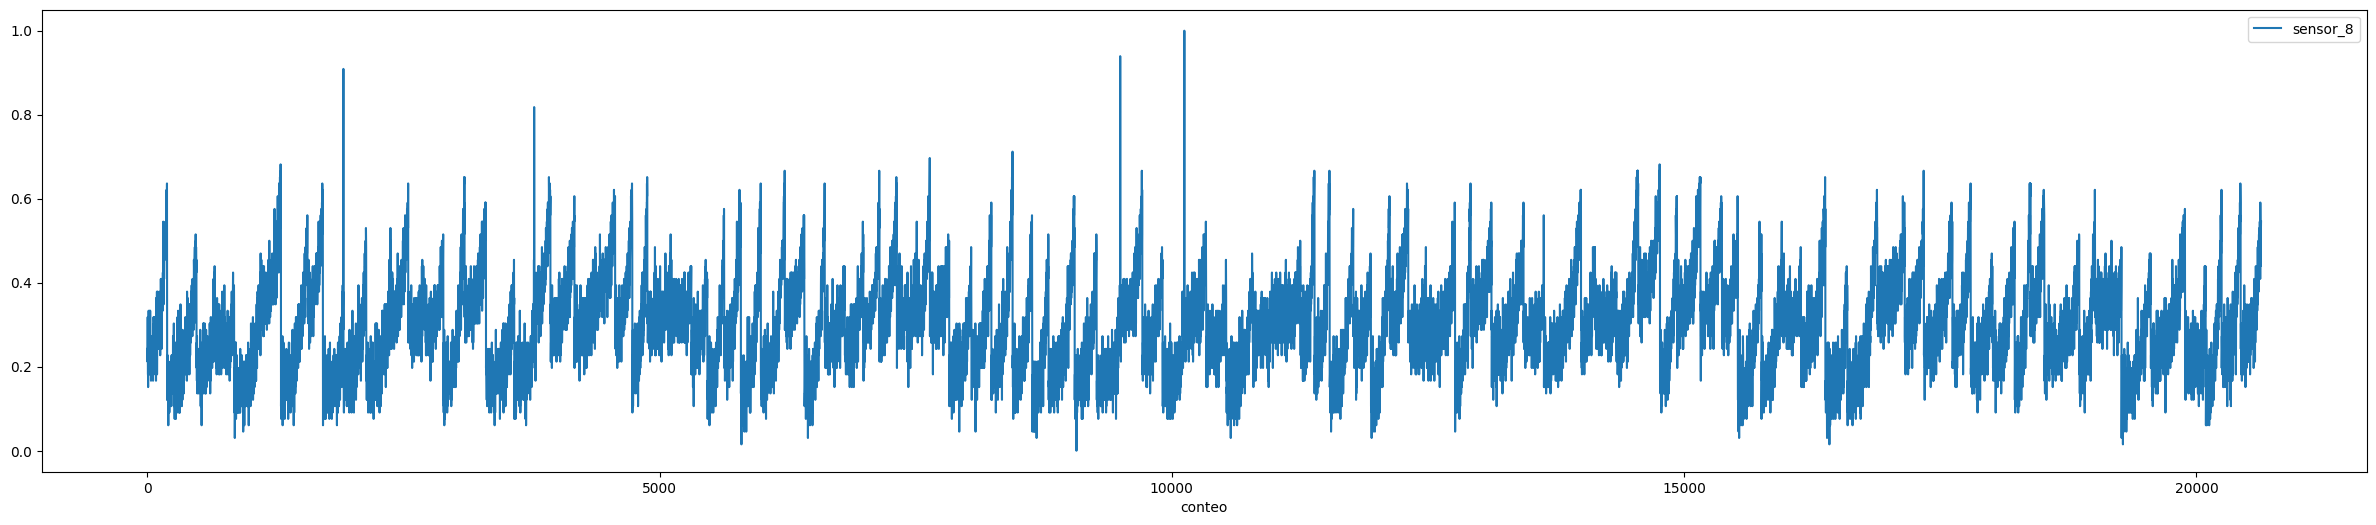

In [7]:
normalizar_0_1(df).plot(
    x = 'conteo',
    y = 'sensor_8',
    figsize=(30,6))

<Axes: xlabel='conteo'>

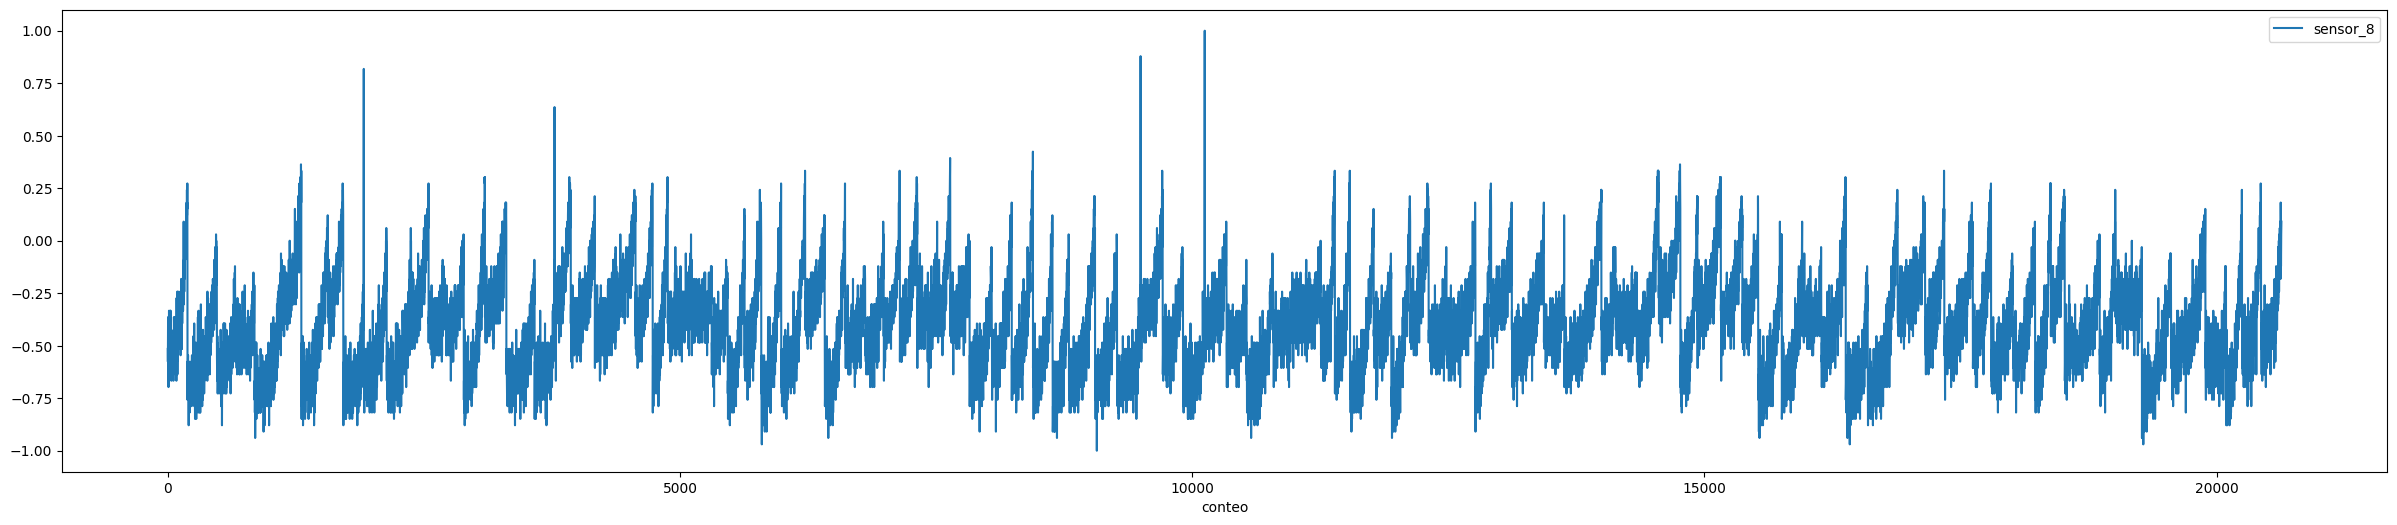

In [8]:
normalizar_neg1_1(df).plot(
    x = 'conteo',
    y = 'sensor_8',
    figsize=(30,6))

<Axes: xlabel='conteo'>

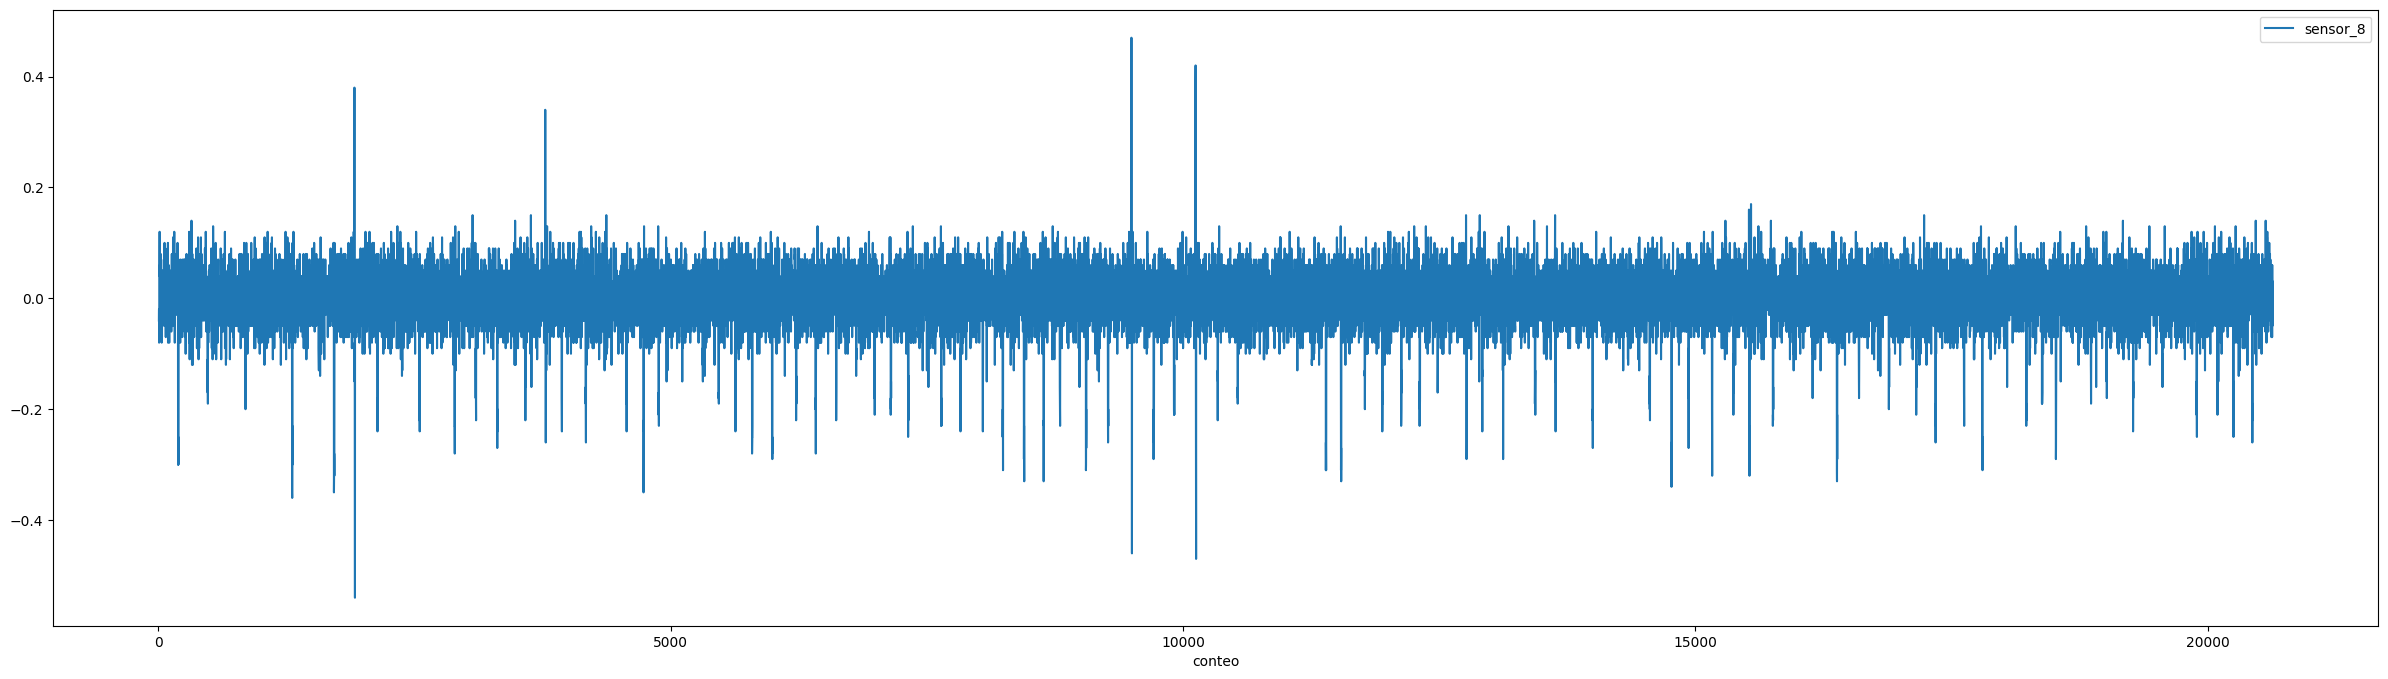

In [9]:
diferenciar(df, 5).plot(
    x = 'conteo',
    y = 'sensor_8',
    figsize=(30,8))

<Axes: xlabel='conteo'>

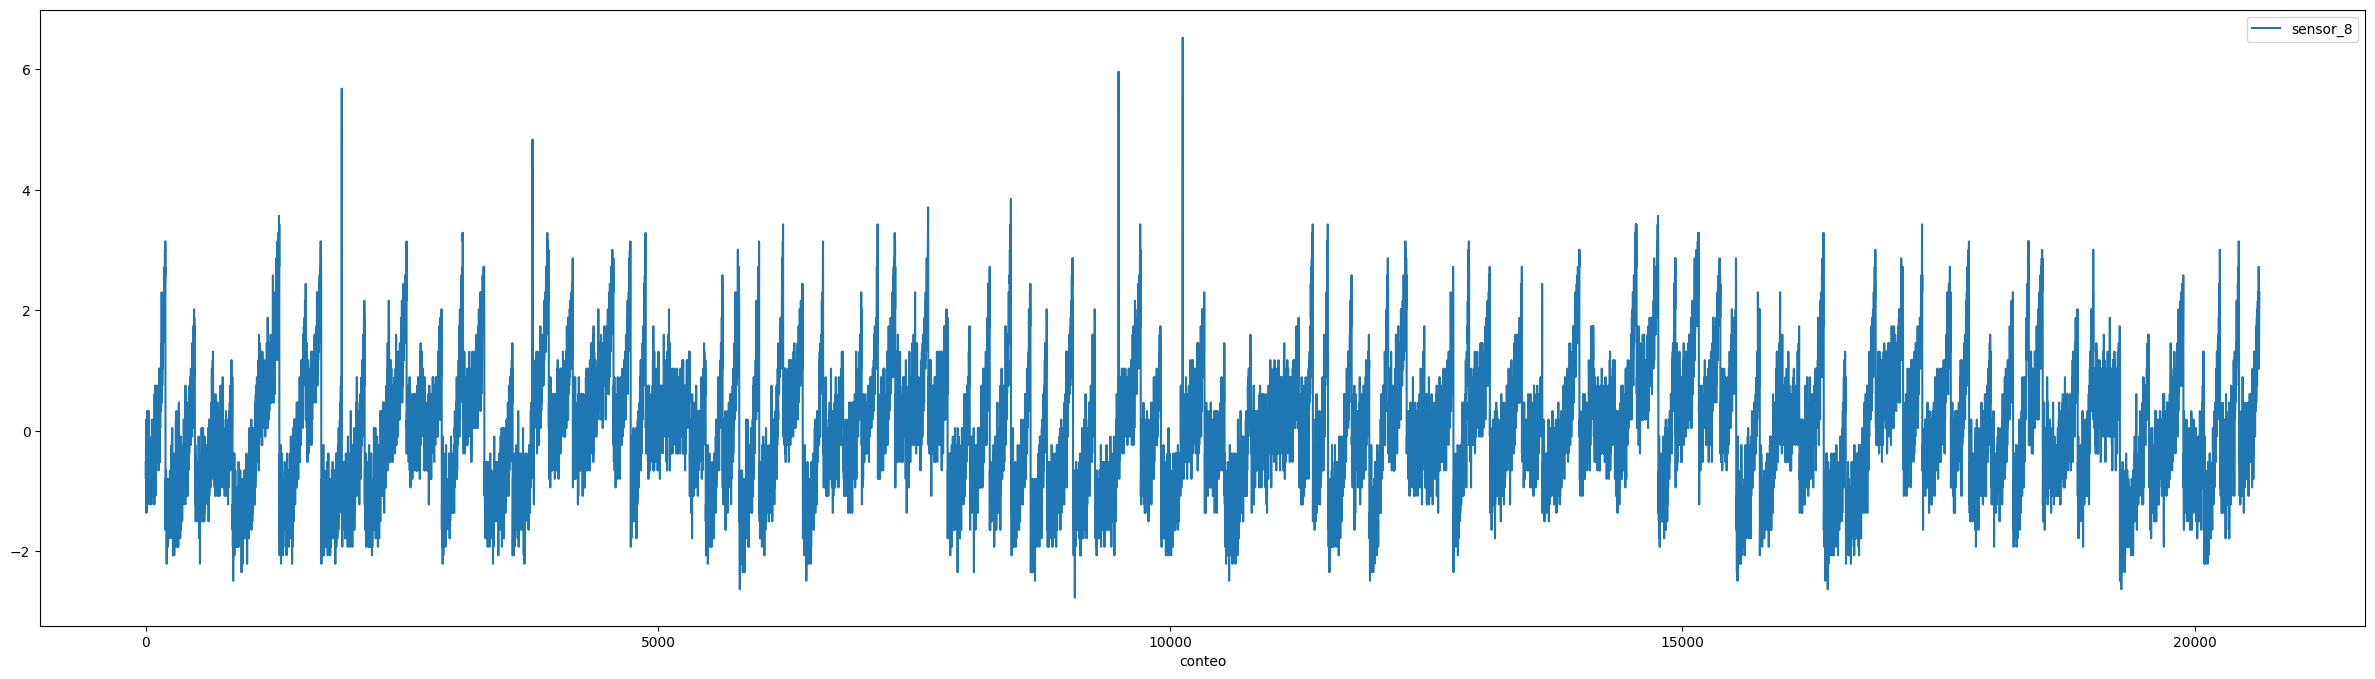

In [10]:
estandarizar(df).plot(
    x = 'conteo',
    y = 'sensor_8',
    figsize=(30,8))

<Axes: xlabel='conteo'>

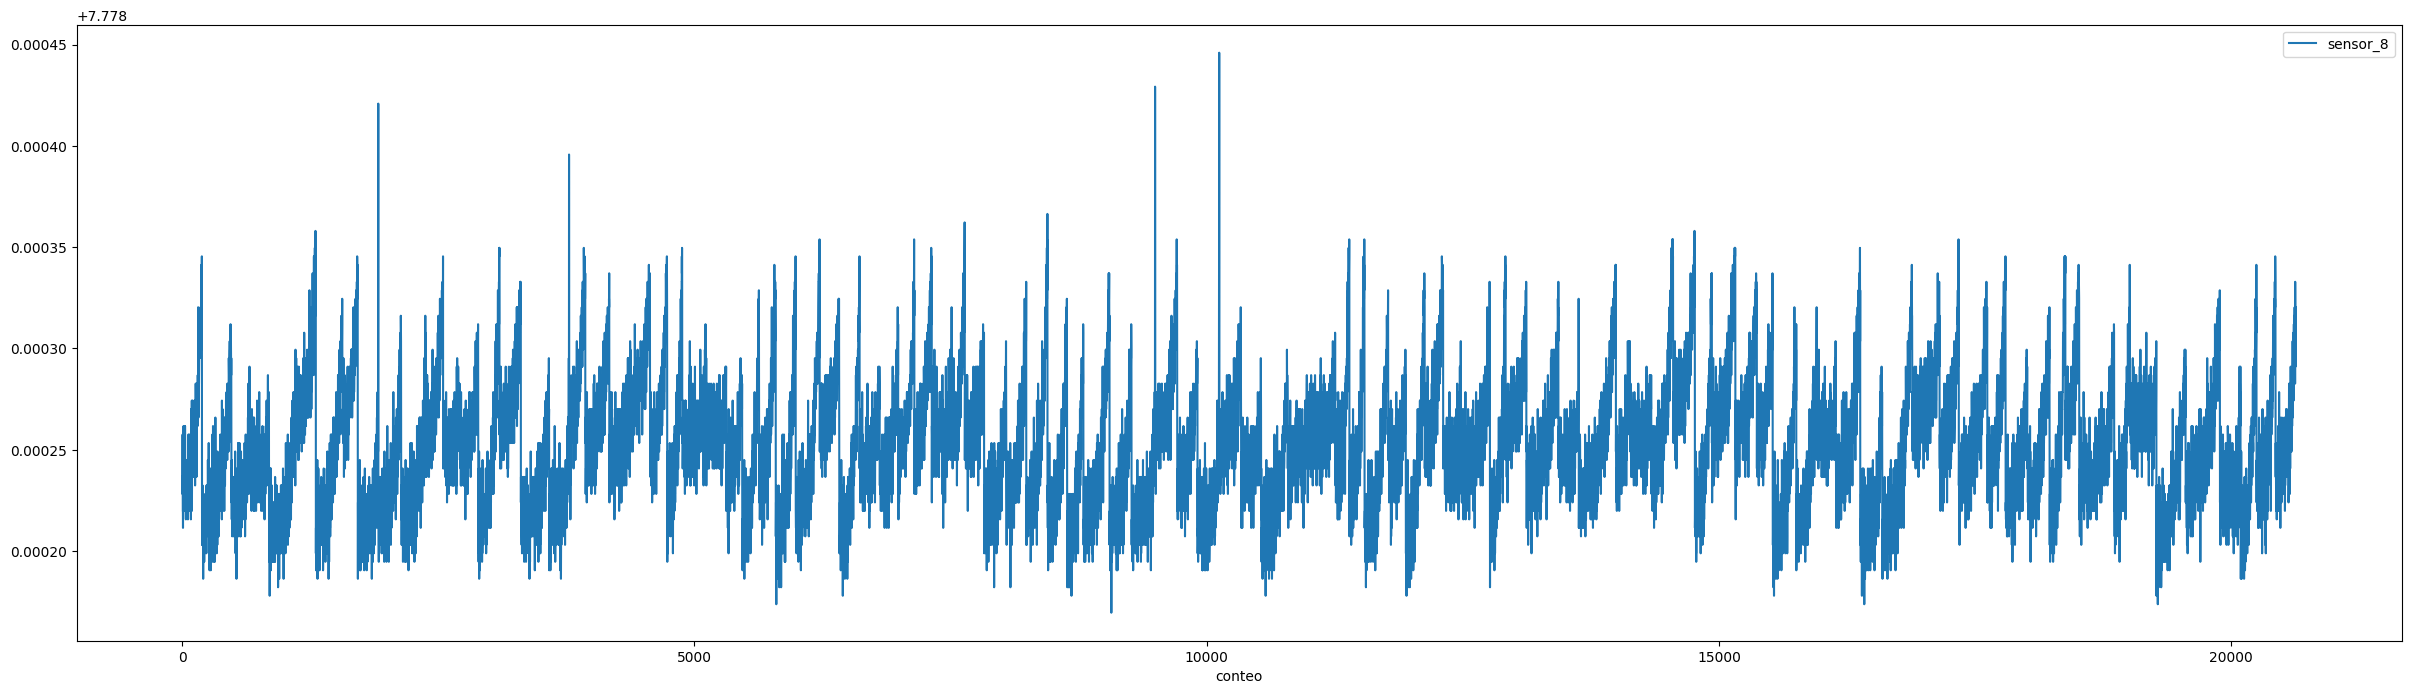

In [11]:
logaritmica(df).plot(
    x = 'conteo',
    y = 'sensor_8',
    figsize=(30,8)
)

<Axes: xlabel='conteo'>

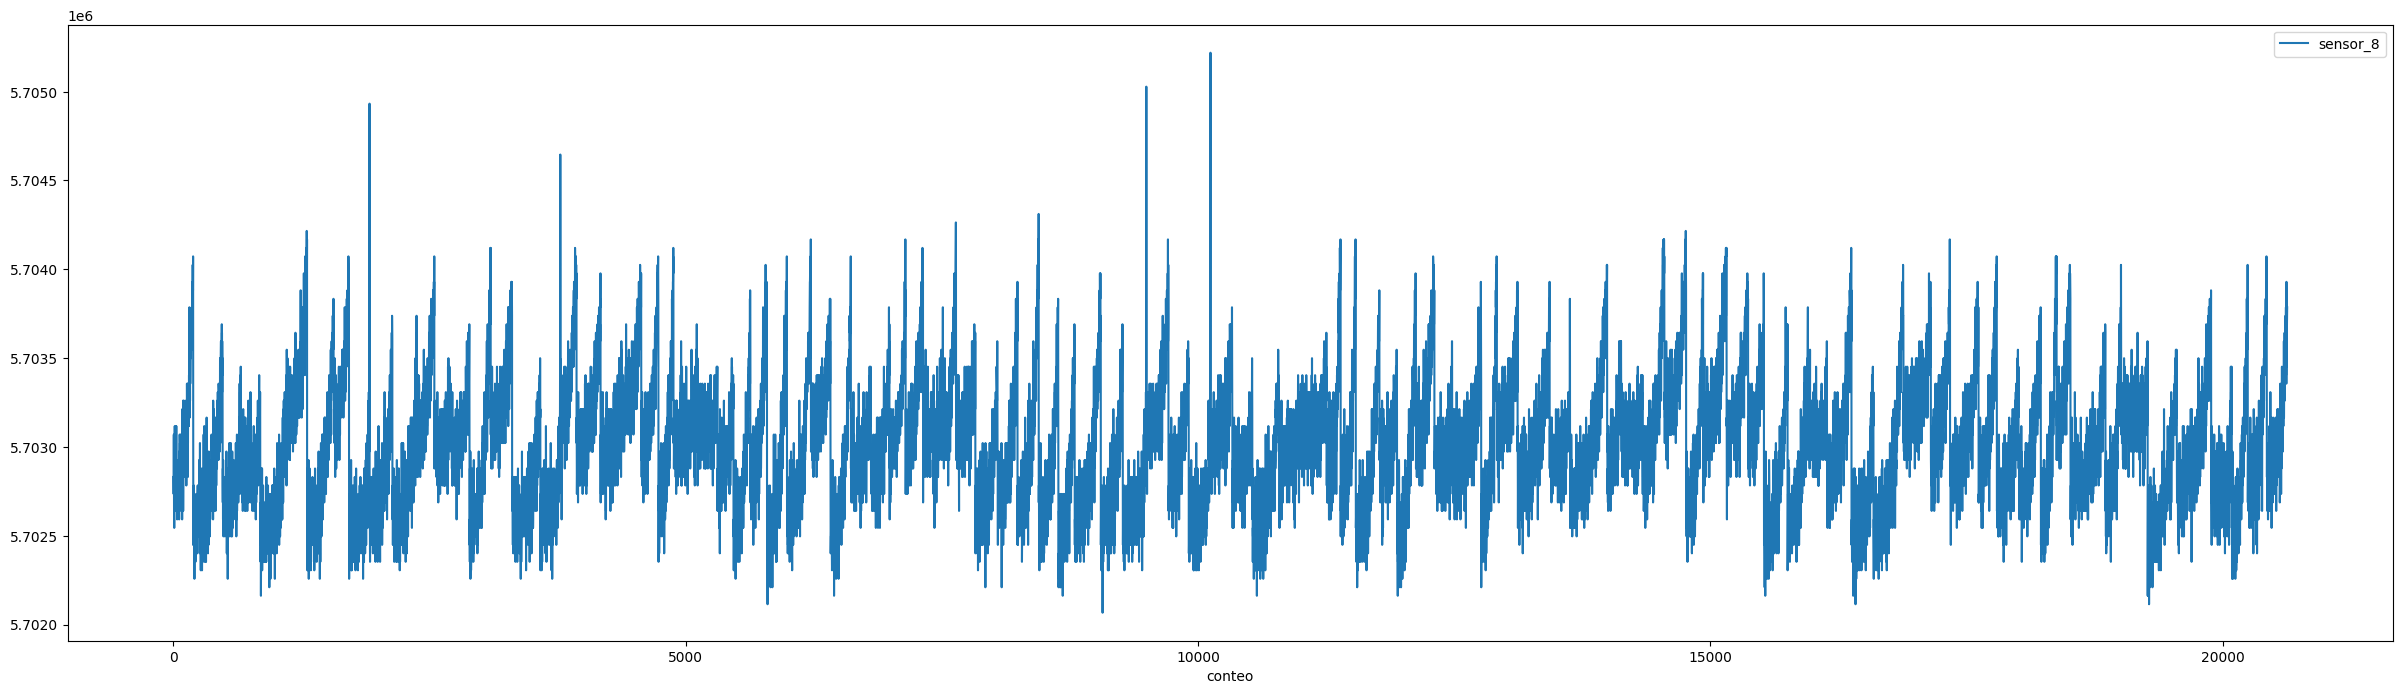

In [12]:
cuadrada(df).plot(
    x = 'conteo',
    y = 'sensor_8',
    figsize=(30, 8))

### Caracterizar CUANTITATIVAMENTE (Tendencia) enfoque aditivo

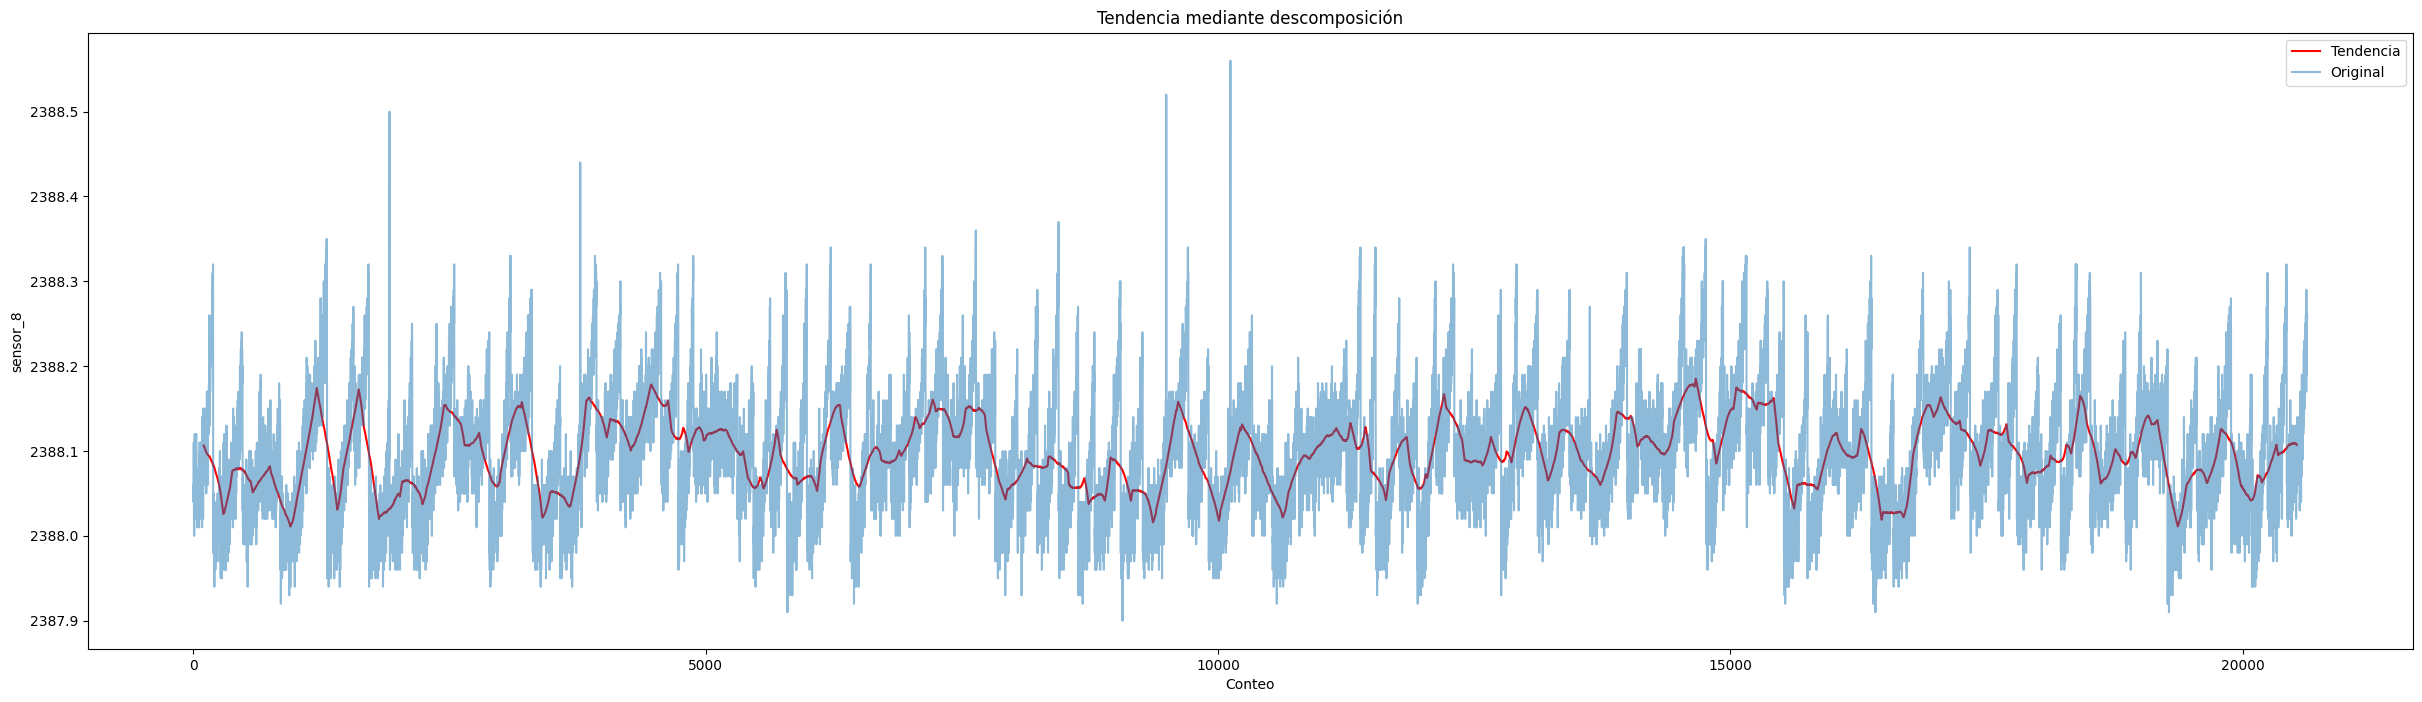

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
20626   NaN
20627   NaN
20628   NaN
20629   NaN
20630   NaN
Name: trend, Length: 20631, dtype: float64

In [17]:
tendencia('sensor_8', df, 200, 'multiplicative') 

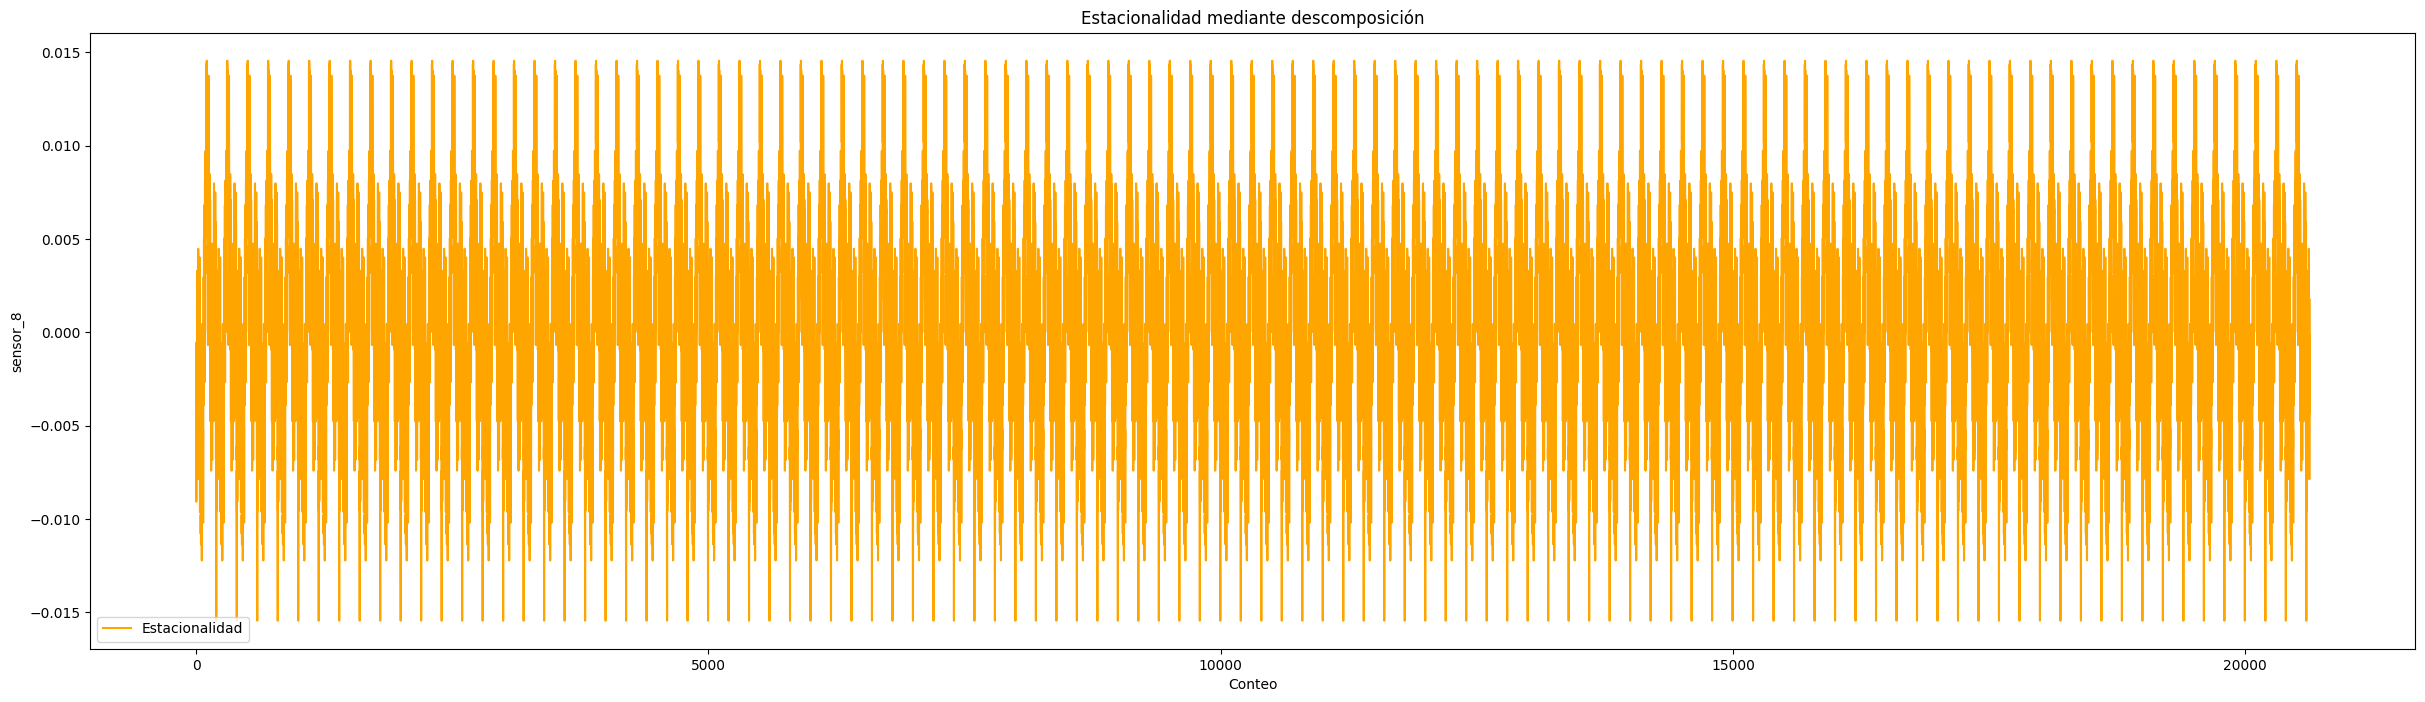

0       -0.007107
1       -0.000732
2       -0.009064
3       -0.008868
4       -0.000533
           ...   
20626   -0.007860
20627   -0.004329
20628   -0.000113
20629   -0.004327
20630    0.001752
Name: seasonal, Length: 20631, dtype: float64

In [18]:
estacionalidad('sensor_8', df, 200, 'additive')

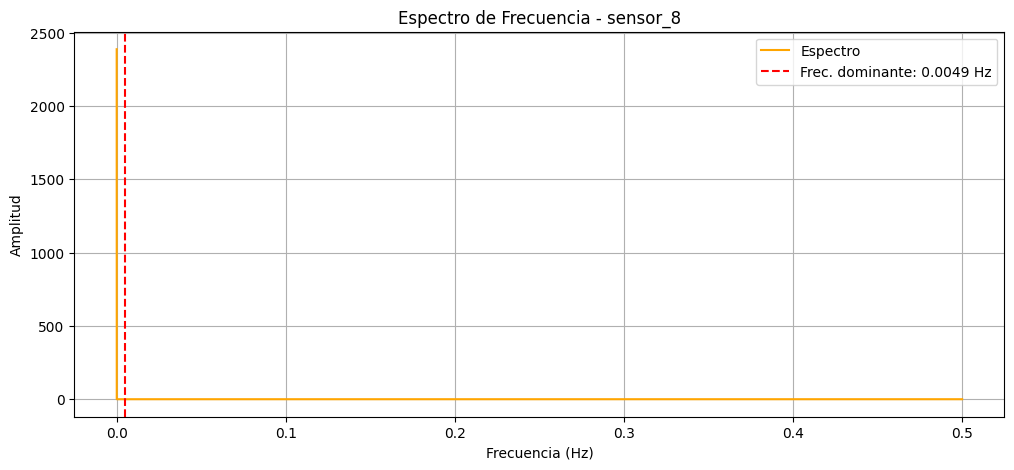

In [21]:
frec_positivas, espectro_positivo, freq_dominante, amp_dominante = dom_freq(df, 'sensor_8')

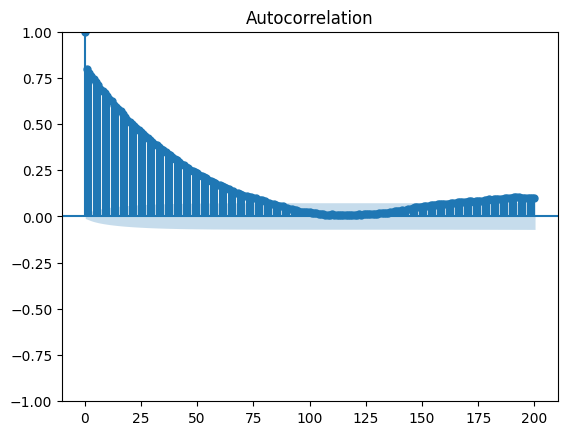

In [ ]:
plot_acf(df['sensor_8'], lags=200)
plt.show()